In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("song_recommendation_data.csv")

In [3]:
print("Shape of DataFrame:", df.shape)
print("\nInfo:\n")
print(df.info())

Shape of DataFrame: (253197, 25)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253197 entries, 0 to 253196
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              253197 non-null  int64  
 1   song_id              253197 non-null  int64  
 2   genre                250680 non-null  object 
 3   language             253197 non-null  object 
 4   duration_sec         253197 non-null  int64  
 5   song_release_year    253197 non-null  int64  
 6   artist_popularity    253197 non-null  int64  
 7   acousticness         253197 non-null  float64
 8   danceability         253197 non-null  float64
 9   energy               253197 non-null  float64
 10  valence              253197 non-null  float64
 11  tempo                253197 non-null  float64
 12  explicit             253197 non-null  int64  
 13  user_age             250646 non-null  float64
 14  user_country         253197

In [4]:
missing = df.isnull().sum()
missing = missing[missing > 0]
print("\nColumns with missing values:\n", missing)


Columns with missing values:
 genre       2517
user_age    2551
dtype: int64


In [5]:
print(df.describe(include="all"))

              user_id        song_id   genre language   duration_sec  \
count   253197.000000  253197.000000  250680   253197  253197.000000   
unique            NaN            NaN       8        6            NaN   
top               NaN            NaN     Pop   German            NaN   
freq              NaN            NaN   31433    42469            NaN   
mean      1587.196973     244.617614     NaN      NaN     254.279691   
std        917.045198     140.781847     NaN      NaN      95.250257   
min          1.000000       1.000000     NaN      NaN      90.000000   
25%        792.000000     123.000000     NaN      NaN     172.000000   
50%       1586.000000     245.000000     NaN      NaN     255.000000   
75%       2380.000000     367.000000     NaN      NaN     337.000000   
max       3173.000000     487.000000     NaN      NaN     419.000000   

        song_release_year  artist_popularity  acousticness   danceability  \
count       253197.000000      253197.000000  2.531970e+05

C:\Users\Vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


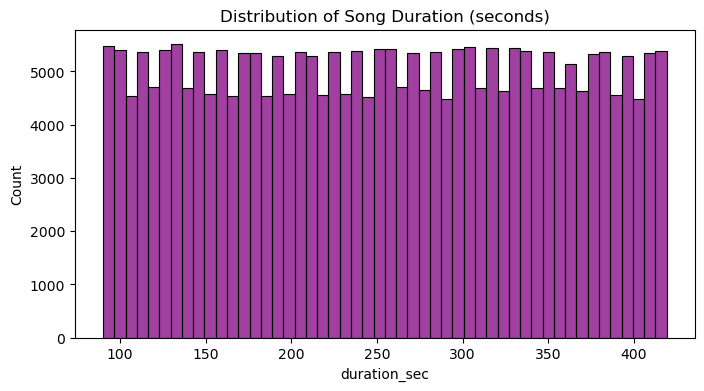

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(df["duration_sec"], bins=50, color="purple")
plt.title("Distribution of Song Duration (seconds)")
plt.show()

C:\Users\Vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


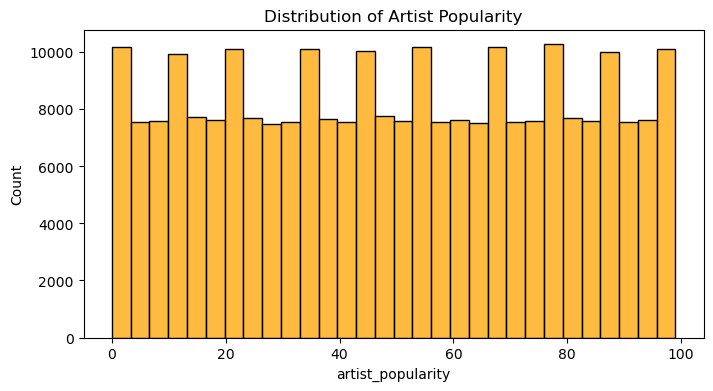

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(df["artist_popularity"], bins=30, color="orange")
plt.title("Distribution of Artist Popularity")
plt.show()

C:\Users\Vishal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


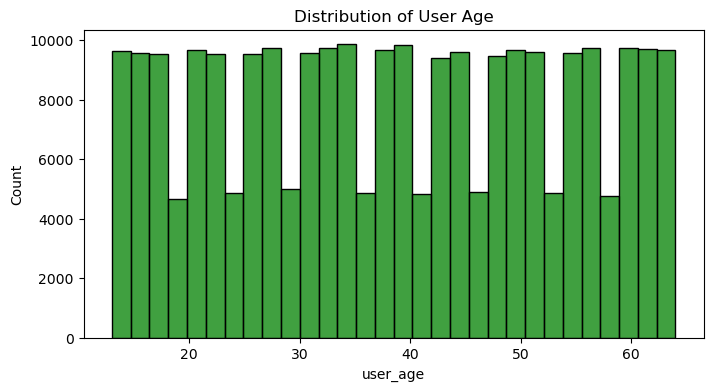

In [8]:

plt.figure(figsize=(8,4))
sns.histplot(df["user_age"].dropna(), bins=30, color="green")
plt.title("Distribution of User Age")
plt.show()

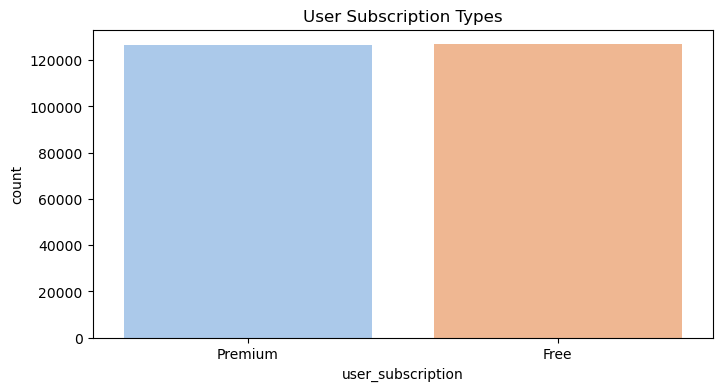

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(x="user_subscription", data=df, palette="pastel")
plt.title("User Subscription Types")
plt.show()

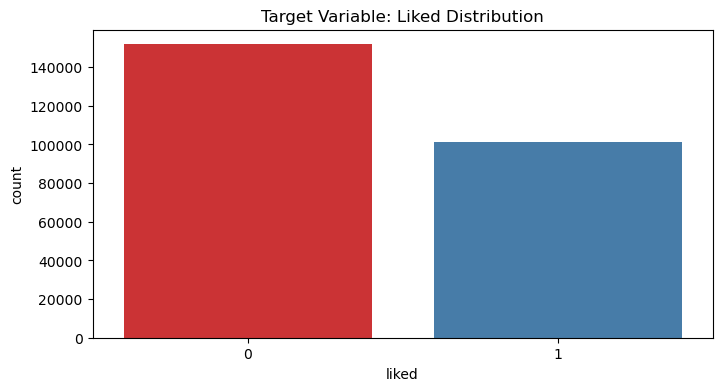

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(x="liked", data=df, palette="Set1")
plt.title("Target Variable: Liked Distribution")
plt.show()

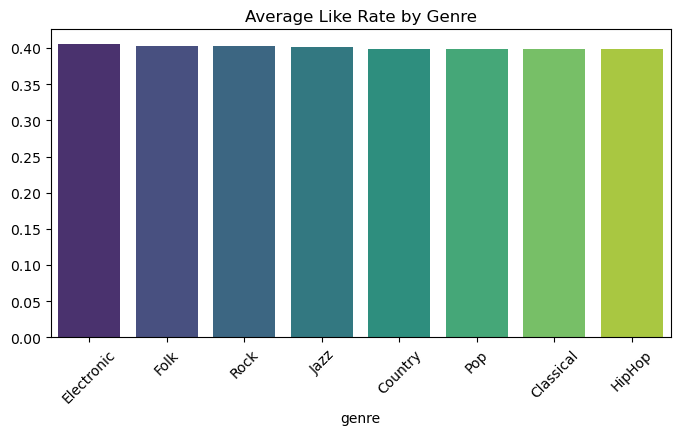

In [13]:
genre_like = df.groupby("genre")["liked"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=genre_like.index, y=genre_like.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Like Rate by Genre")
plt.show()

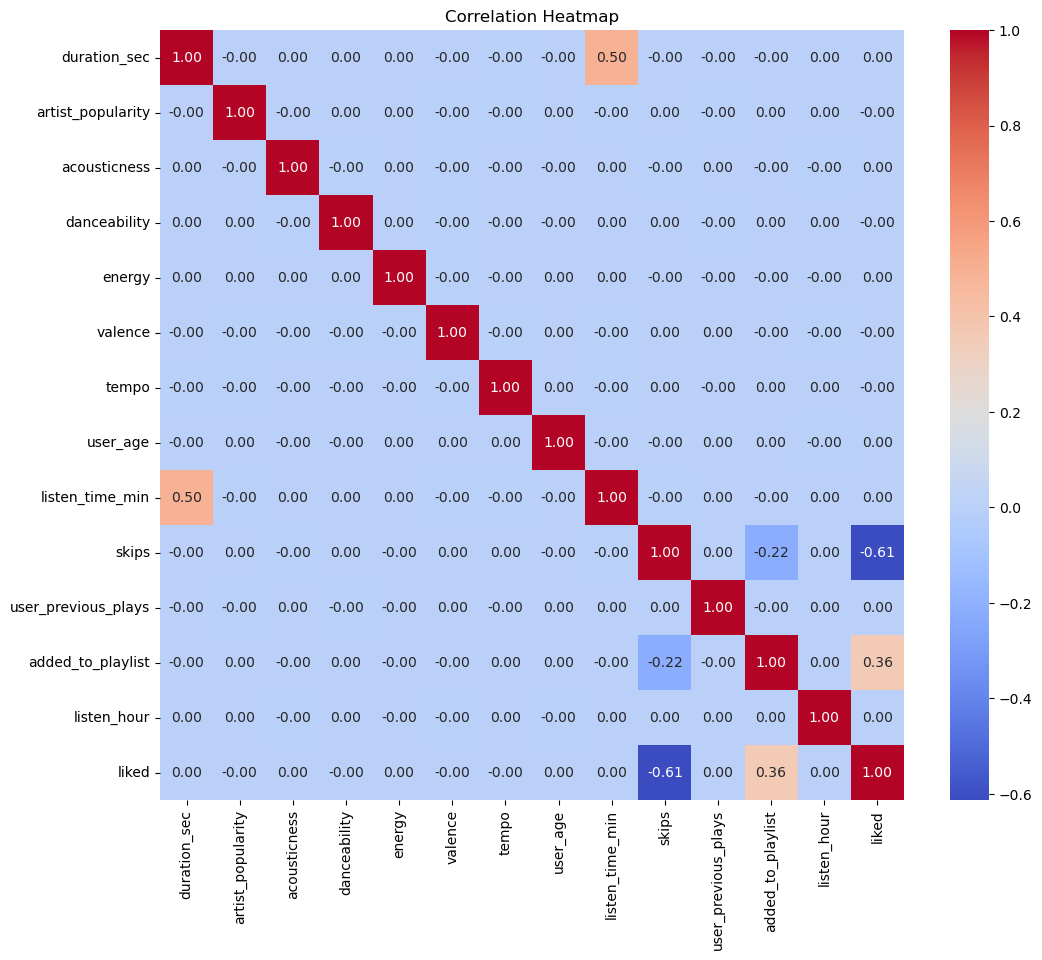

In [14]:
numerical_cols = ["duration_sec", "artist_popularity", "acousticness",
                  "danceability", "energy", "valence", "tempo",
                  "user_age", "listen_time_min", "skips",
                  "user_previous_plays", "added_to_playlist", "listen_hour"]

corr = df[numerical_cols + ["liked"]].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

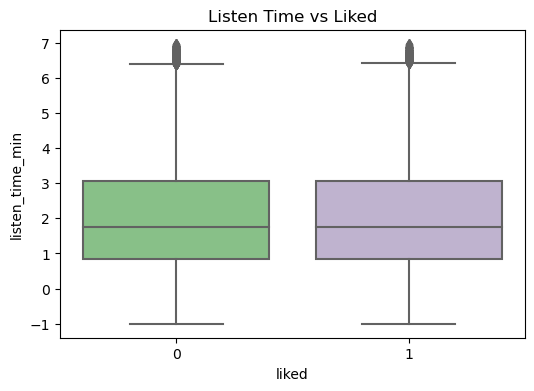

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x="liked", y="listen_time_min", data=df, palette="Accent")
plt.title("Listen Time vs Liked")
plt.show()

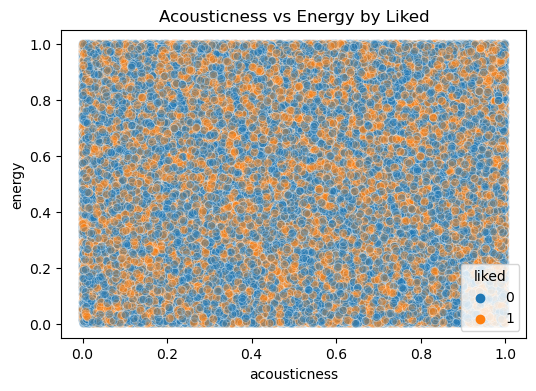

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="acousticness", y="energy", hue="liked", data=df, alpha=0.4)
plt.title("Acousticness vs Energy by Liked")
plt.show()

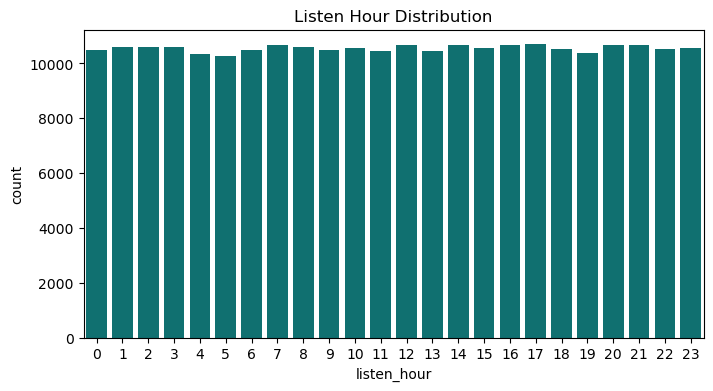

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(x="listen_hour", data=df, color="teal")
plt.title("Listen Hour Distribution")
plt.show()